In [1]:
import collections, itertools, re
import numpy as np
from scipy.spatial.distance import cosine

In [2]:
file_in_name = 'sentences.txt'
file_out_name = 'mysubmission-1.txt'

In [3]:
sentences = []

with open(file_in_name, 'rt') as fh:
    for line in fh:
        sentence = list(filter(None, re.split(r'[^a-z]+', line.strip().lower())))
        if sentence:
            sentences.append(sentence)

tokens = set(itertools.chain(*sentences))

In [4]:
rows = len(sentences)    
cols = len(tokens)

print('{} rows, {} cols'.format(rows, cols))

m = np.empty((rows, cols), dtype=int)

for i, sentence in enumerate(sentences):
    for j, token in enumerate(tokens):
        m[i, j] = sentence.count(token)


22 rows, 254 cols


In [5]:
first =  m[[0]]
dists = np.zeros((rows,))

for row in range(1, rows):
    other =  m[[row]]
    dists[row] = cosine(first, other)

In [6]:
rows_by_dists = sorted(range(1, rows), key=lambda x: dists[x])

with open(file_out_name, 'wt') as fh:
    fh.write(' '.join(map(str, rows_by_dists[:2])))
    

    !cat $file_out_name

6 4

Populating the interactive namespace from numpy and matplotlib


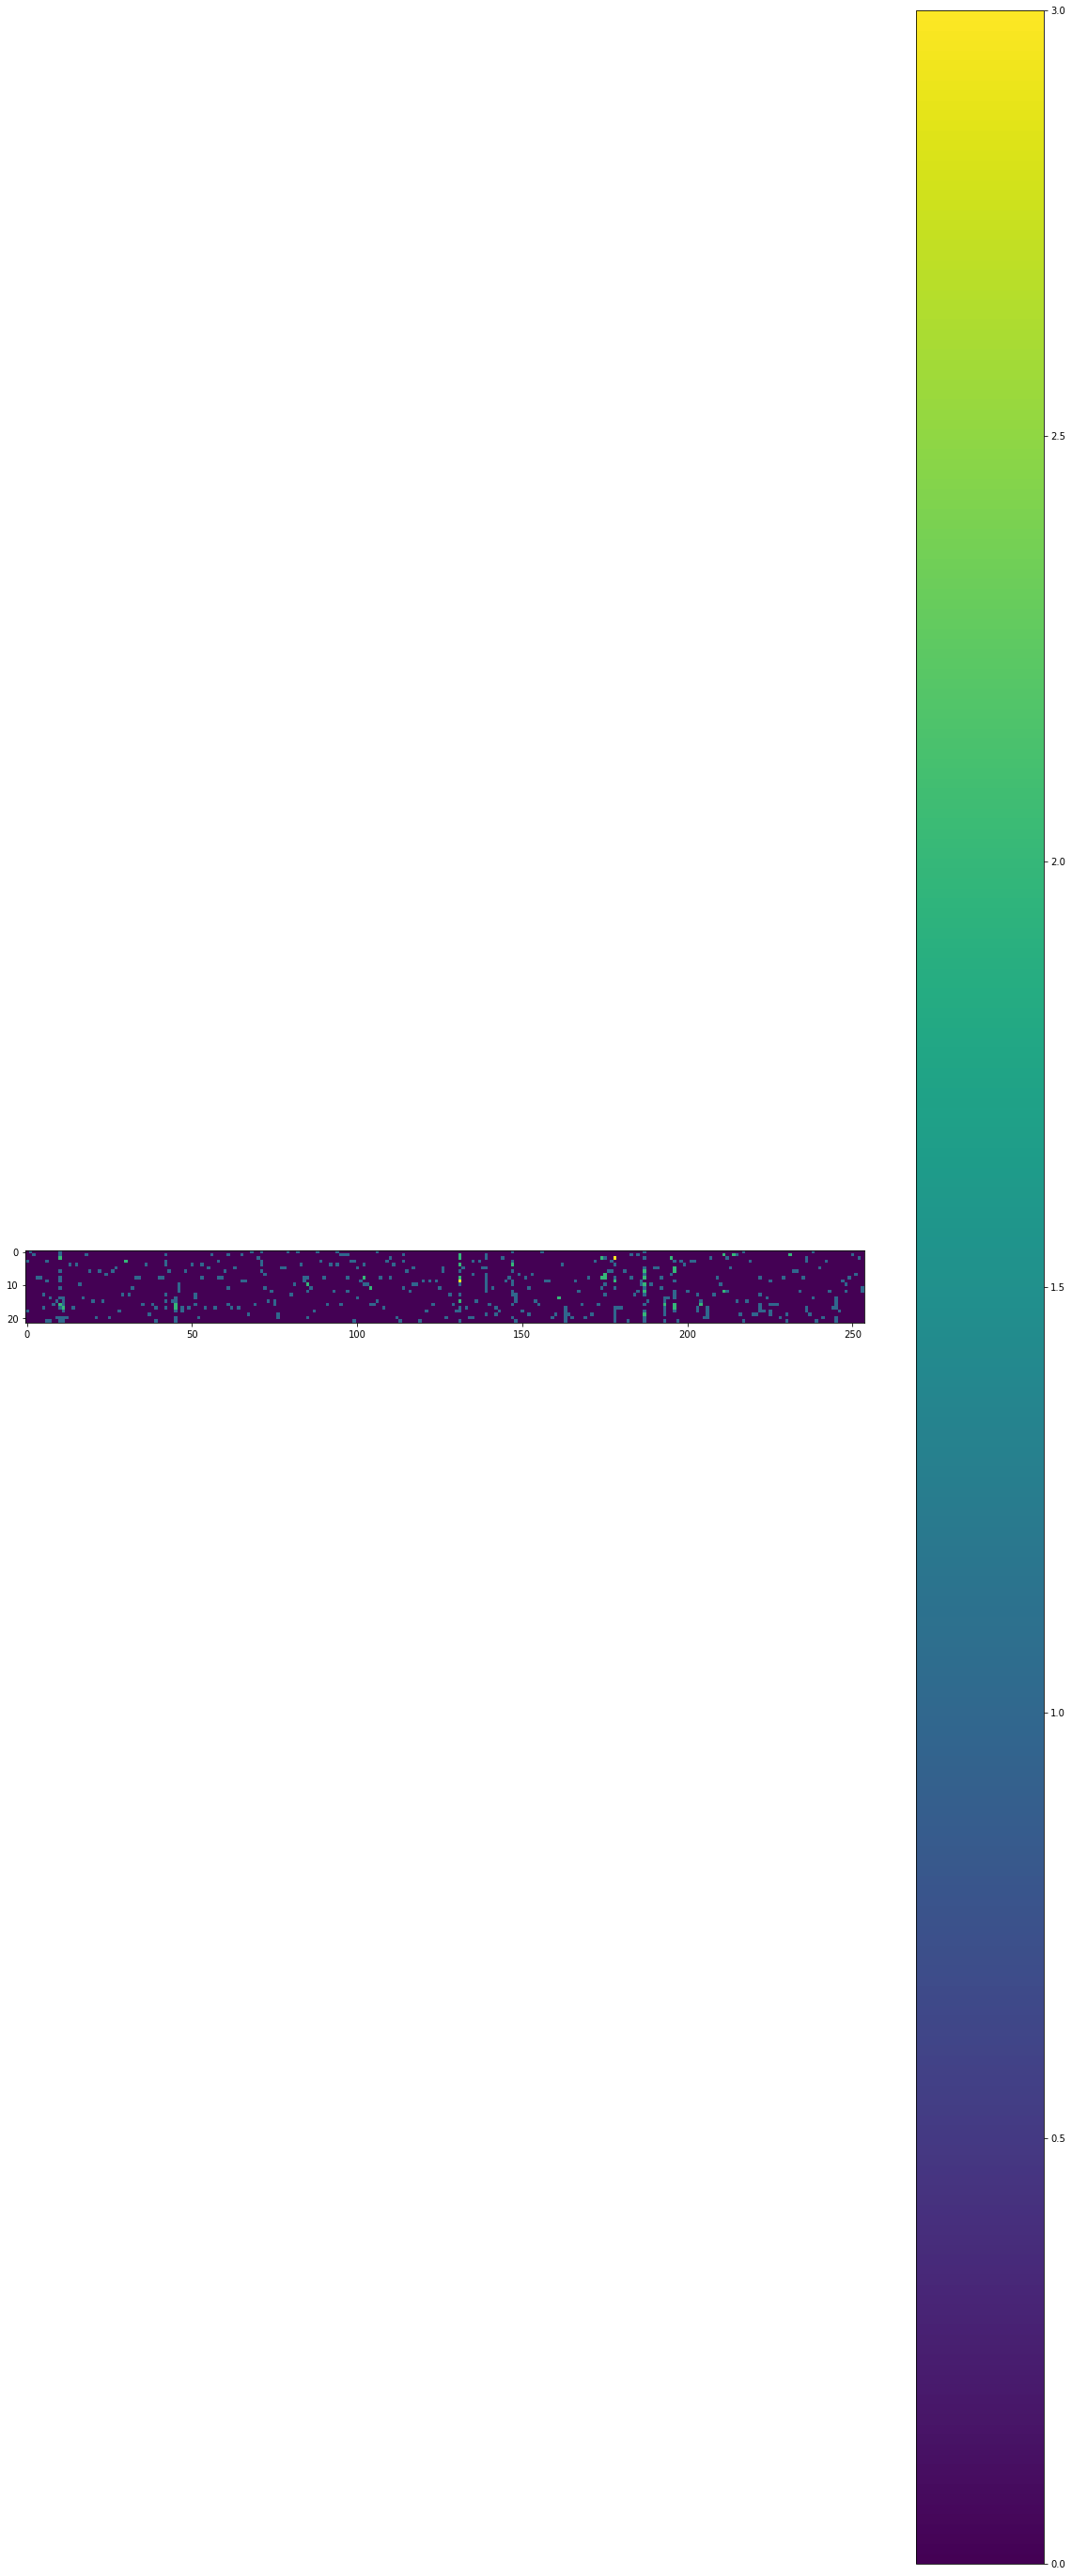

In [30]:
%pylab inline 

plt.rcParams['figure.figsize'] = [20, 50]
plt.imshow(m)
plt.colorbar()
plt.show()

(10000,)